# Attribute Information:

Input variables:
## bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
## other attributes:<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
## social and economic context attributes<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

Output variable (desired target):<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

In [0]:
import pandas as pd
bank = pd.read_csv("bank.csv")

In [0]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [0]:
bank.describe()
# (eduction, default), (eduction, balance), (balance,default)

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [0]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


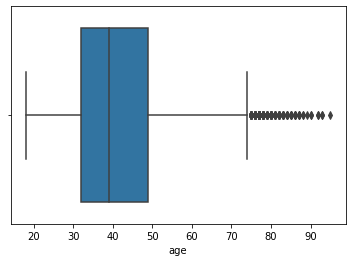

In [0]:
import seaborn as sns
sns.boxplot(x = bank.age)

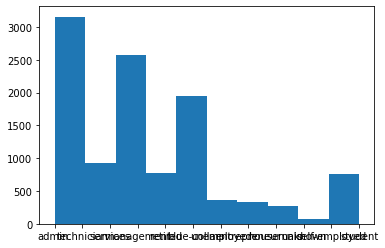

<Figure size 72000x7200 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
plt.hist(bank.job)
plt.figure(figsize=(1000,100))
plt.show()


(array([5289.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5873.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

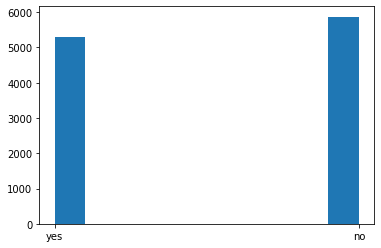

In [0]:
plt.hist(bank.deposit)

In [0]:
bank.age.value_counts().sort_index().loc[31]

496

In [0]:
bank
# (eduction, default), (eduction, balance), (balance,default)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


deposit,no,yes
default,,
no,5757,5237
yes,116,52


<Figure size 720x504 with 0 Axes>

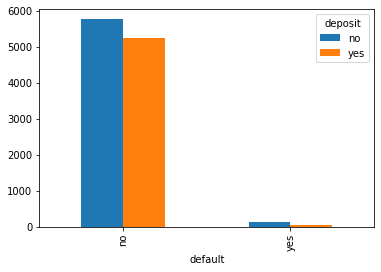

In [0]:
#deposit nad default
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.gcf()
fig.set_size_inches(10,7)
ct =  pd.crosstab(bank.default,bank.deposit)
ct.plot.bar()
pd.crosstab(bank.default,bank.deposit)

<Figure size 720x504 with 0 Axes>

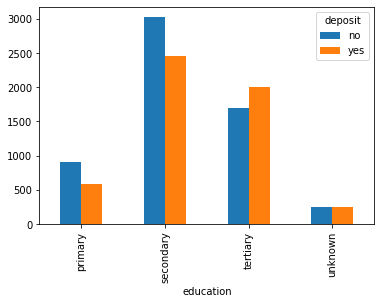

In [0]:
#education nad balance

import matplotlib.pyplot as plt
fig=plt.gcf()
fig.set_size_inches(10,7)
ct = pd.crosstab(bank.education,bank.deposit)
ct.plot.bar()


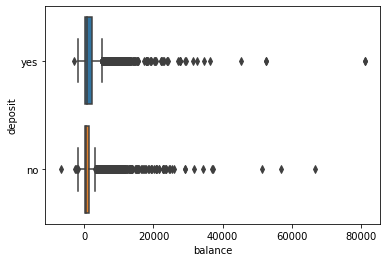

In [0]:
#balance and education
sns.boxplot(y = bank.deposit,x = bank.balance)


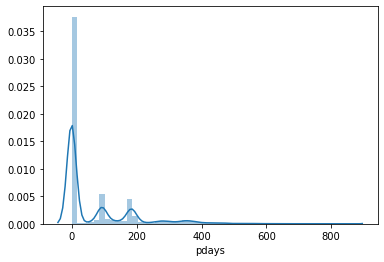

In [0]:
sns.distplot(bank.pdays.loc[bank.deposit == "yes"])

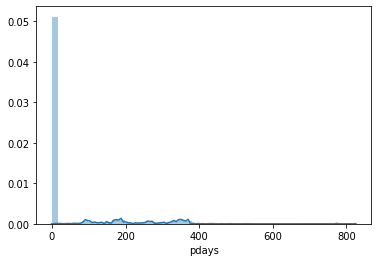

In [0]:
sns.distplot(bank.pdays.loc[bank.deposit == "no"])

In [0]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [0]:
from scipy import stats
a = bank[bank["deposit"] == 'yes']['balance']
b = bank[bank['deposit'] == 'no']['balance']
stats.ttest_ind(a, b)

Ttest_indResult(statistic=8.598842126021864, pvalue=9.126568254859532e-18)

In [0]:
a = bank[bank["deposit"] == 'yes']['age']
b = bank[bank['deposit'] == 'no']['age']
stats.ttest_ind(a, b)

Ttest_indResult(statistic=3.6892130272779955, pvalue=0.00022601800590796526)

In [0]:
a = bank[bank["deposit"] == 'yes']['duration']
b = bank[bank['deposit'] == 'no']['duration']
stats.ttest_ind(a, b)

Ttest_indResult(statistic=53.51796190607506, pvalue=0.0)

In [0]:
bank[bank["deposit"] == "yes"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,retired,divorced,primary,no,1389,no,no,cellular,8,apr,335,1,-1,0,unknown,yes
5285,30,management,single,tertiary,no,398,no,no,cellular,27,oct,102,1,180,3,success,yes
5286,69,retired,divorced,tertiary,no,247,no,no,cellular,22,apr,138,2,-1,0,unknown,yes
5287,48,entrepreneur,married,secondary,no,0,no,yes,cellular,28,jul,431,2,-1,0,unknown,yes


In [0]:
bank[bank["deposit"] == "no"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,no
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,no
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,no
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,no
5293,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [0]:
crosstab = pd.crosstab(bank.deposit,bank.default)
print(stats.chi2_contingency(crosstab))
print(crosstab)
#print('The first value is the Chi-square value, followed by the p-value, then comes the degrees of freedom')

(17.808573693473097, 2.442800179192829e-05, 1, array([[5784.60508869,   88.39491131],
       [5209.39491131,   79.60508869]]))
default    no  yes
deposit           
no       5757  116
yes      5237   52


In [0]:
crosstab = pd.crosstab(bank.deposit,bank.marital)
print(stats.chi2_contingency(crosstab))
print(crosstab)

(109.58335610012479, 1.600576988089358e-24, 2, array([[ 680.32512095, 3341.64334349, 1851.03153557],
       [ 612.67487905, 3009.35665651, 1666.96846443]]))
marital  divorced  married  single
deposit                           
no            671     3596    1606
yes           622     2755    1912


In [0]:
crosstab = pd.crosstab(bank.deposit,bank.job)
print(stats.chi2_contingency(crosstab))
print(crosstab)

(378.0752558664989, 2.741689587081072e-74, 11, array([[ 701.89768859, 1022.85540226,  172.58054112,  144.16789106,
        1350.12703817,  409.35262498,  213.09487547,  485.645852  ,
         189.41766708,  959.19001971,  187.83918653,   36.83121304],
       [ 632.10231141,  921.14459774,  155.41945888,  129.83210894,
        1215.87296183,  368.64737502,  191.90512453,  437.354148  ,
         170.58233292,  863.80998029,  169.16081347,   33.16878696]]))
job      admin.  blue-collar  entrepreneur  ...  technician  unemployed  unknown
deposit                                     ...                                 
no          703         1236           205  ...         983         155       36
yes         631          708           123  ...         840         202       34

[2 rows x 12 columns]


In [0]:
bank.job.nunique()

12

In [0]:
crosstab = pd.crosstab(bank.deposit,bank.housing)
print(stats.chi2_contingency(crosstab))
print(crosstab)

(463.1892407533161, 9.724394114495535e-103, 1, array([[3094.3480559, 2778.6519441],
       [2786.6519441, 2502.3480559]]))
housing    no   yes
deposit            
no       2527  3346
yes      3354  1935


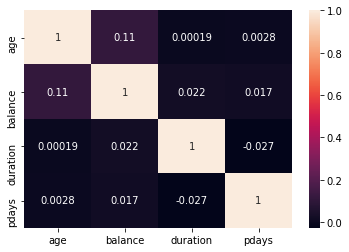

In [0]:
a = "age balance duration pdays".split()
b = bank.corr().loc[a,a]
sns.heatmap(b,annot= True)

In [0]:
new_data = pd.get_dummies(bank, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'], drop_first=True)

In [0]:
#def label(x):
#  if x == "yes":
#    return 1
#  else:
#    return 0

#new_data.deposit = new_data.deposit.map(lambda x: label(x))


In [0]:
#making X
X = new_data.drop(columns = "deposit") 
Y = new_data.deposit
new_data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,yes,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,yes,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,yes,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,yes,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,no,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state = 5)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_predicted= logreg.predict(X_test)

In [0]:
log_predicted

array(['no', 'no', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(Y_test,log_predicted))

Classification Report: 
               precision    recall  f1-score   support

          no       0.81      0.82      0.82      1170
         yes       0.80      0.79      0.80      1063

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [0]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
#fit into DcisionTreeClassifier()
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#predict dtree
D_pred = Dtree.predict(X_test)

In [0]:
D_pred

array(['no', 'yes', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [0]:
#import libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
#print report
print(confusion_matrix(Y_test, D_pred))
print('Accuracy: \n', accuracy_score(Y_test,D_pred))
print('Classification Report: \n', classification_report(Y_test,D_pred))

[[931 239]
 [216 847]]
Accuracy: 
 0.7962382445141066
Classification Report: 
               precision    recall  f1-score   support

          no       0.81      0.80      0.80      1170
         yes       0.78      0.80      0.79      1063

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



In [0]:
R_f_c = RandomForestClassifier(random_state= 7)
R_f_c.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [0]:
RF_pred = R_f_c.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(Y_test, D_pred)
print('Accuracy: \n', accuracy_score(Y_test,RF_pred))
print('Classification Report: \n', classification_report(Y_test,RF_pred))
confusion_matrix(Y_test, RF_pred)

Accuracy: 
 0.8531124048365427
Classification Report: 
               precision    recall  f1-score   support

          no       0.90      0.81      0.85      1170
         yes       0.81      0.90      0.85      1063

    accuracy                           0.85      2233
   macro avg       0.86      0.86      0.85      2233
weighted avg       0.86      0.85      0.85      2233



array([[948, 222],
       [106, 957]])

In [0]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x, y)   

7595     no
9594     no
1875    yes
7252     no
469     yes
       ... 
54      yes
7141     no
6113     no
5912     no
5284    yes
Name: deposit, Length: 2233, dtype: object

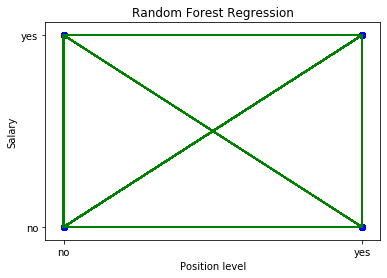

In [0]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, RF_pred, color = 'blue')   
# plot predicted data 
plt.plot(Y_test, RF_pred, color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#create a dictionary of all values we want to test
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
#fit model to data
dtree_gscv.fit(X, Y)
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 12}

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=12)
dtc.fit()